In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Borramos las variables que no consideramos necesarias
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.shape

(10000, 11)

In [4]:
#datos descriptivos de las variables
describe = df.describe()
np.transpose(describe)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [5]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

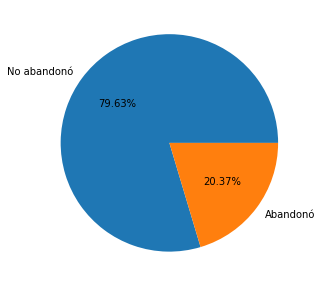

In [6]:
#Vamos a hacer un pie de los valores de la variable objetivo


labels = ["No abandonó", "Abandonó"]
values = df["Exited"].value_counts()

plt.figure(figsize = (5,5))
plt.pie(values, labels = labels, autopct = "%.2f%%")
plt.show()

In [7]:
#Vemos los valores nulos de cada variable

for feature in df.columns:
    
    print("La variable {} tiene {} valores nulos".format(feature, df[feature].isnull().sum()))

La variable CreditScore tiene 0 valores nulos
La variable Geography tiene 0 valores nulos
La variable Gender tiene 0 valores nulos
La variable Age tiene 0 valores nulos
La variable Tenure tiene 0 valores nulos
La variable Balance tiene 0 valores nulos
La variable NumOfProducts tiene 0 valores nulos
La variable HasCrCard tiene 0 valores nulos
La variable IsActiveMember tiene 0 valores nulos
La variable EstimatedSalary tiene 0 valores nulos
La variable Exited tiene 0 valores nulos


In [8]:
#Ahora guardamos en una variable las características que sean numéricas

numeric_vars = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature]) == True  and df[feature].nunique() > 2 ]      


print("Número de variables numéricas: ", len(numeric_vars))

Número de variables numéricas:  6


In [9]:
#Dividimos los datos en discretos y continuos

discrete_vars = [feature for feature in numeric_vars if len(df[feature].unique()) < 25]
continous_vars = [feature for feature in numeric_vars if len(df[feature].unique()) > 25]
print("Número de variables discretas: ",len(discrete_vars))
print("Número de variables continuas: ", len(continous_vars))

Número de variables discretas:  2
Número de variables continuas:  4


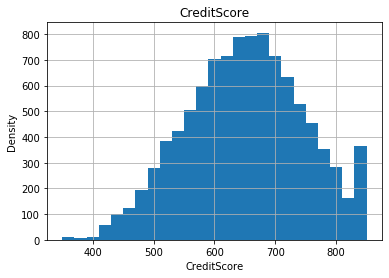

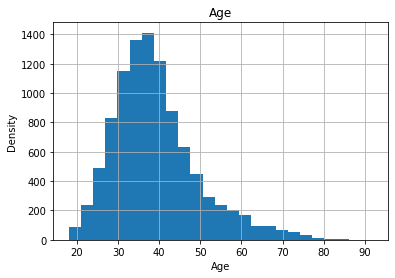

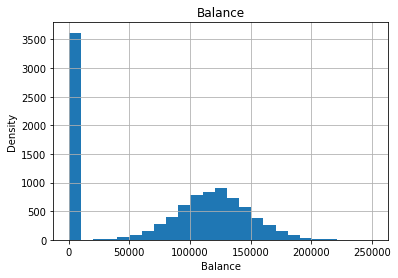

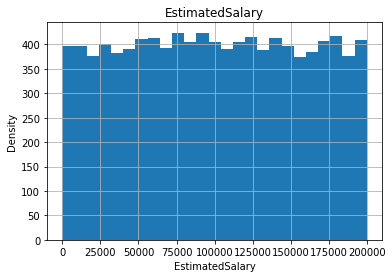

In [10]:
#Vamos a ver la simetría  y la curtosis de las variables continuas

for feature in continous_vars:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(feature)
    plt.show()

In [11]:
#Ahora vamos a guardar en una lista las variables categóricas


categorical_vars = [feature for feature in df.columns if df[feature].dtype == "O" or df[feature].nunique() == 2]

print("Número de variables categóricas: ", len(categorical_vars))


Número de variables categóricas:  5


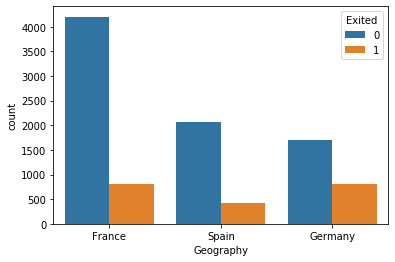

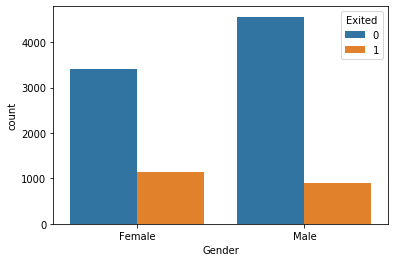

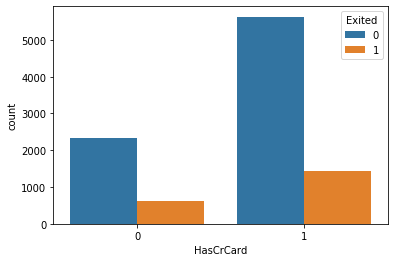

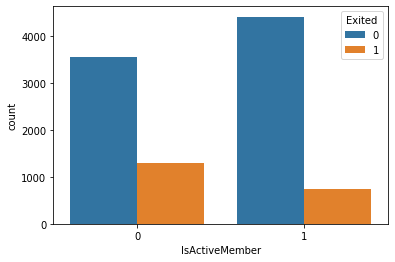

In [27]:
for feature in categorical_vars:
    
    if feature != "Exited":
        sns.countplot(x = feature, data = df, hue = "Exited")
        plt.show()

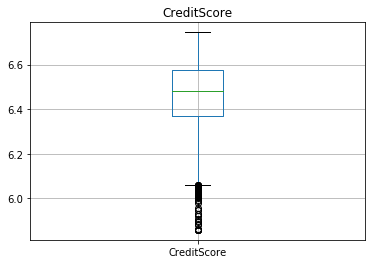

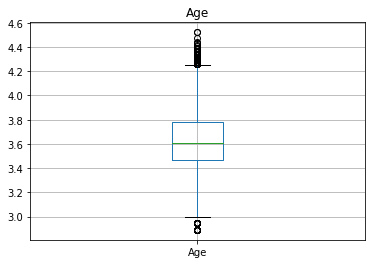

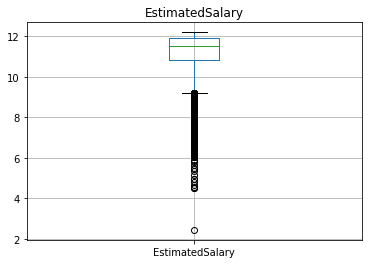

In [10]:
#A continuación, vamos a buscar algunos datos anómalos el las variables continuas


for feature in continous_vars:
    
    data = df.copy()
    if 0 in df[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.title(feature)
        plt.show()
    
    
    

In [11]:
#Vamos a eliminar los datos anómalos de las tres variables


#Cuantiles Creditscore

cuantilcs_25 = df["CreditScore"].quantile(0.25)
cuantilcs_75 = df["CreditScore"].quantile(0.75)
iqr_cs = cuantilcs_75 - cuantilcs_25
ll_cs = cuantilcs_25 - (1.5 * iqr_cs)
ul_cs = cuantilcs_75 + (1.5 * iqr_cs)
#Cuantiles Age

cuantilage_25 = df["Age"].quantile(0.25)
cuantilage_75 = df["Age"].quantile(0.75)
iqr_age = cuantilage_75 - cuantilage_25
ll_age = cuantilage_25 - (1.5 * iqr_age)
ul_age = cuantilage_75 + (1.5 * iqr_age)
#Cuantiles EstimatedSalary

cuantiles_25 = df["EstimatedSalary"].quantile(0.25)
cuantiles_75 = df["EstimatedSalary"].quantile(0.75)
iqr_es = cuantiles_75 - cuantiles_25
ll_es = cuantiles_25 - (1.5 * iqr_es)
ul_es = cuantiles_75 + (1.5 * iqr_es)


In [12]:
lower_outliers = df[df["CreditScore"] < ll_cs ].index
lower_outliers = list(lower_outliers)

In [13]:
df.drop(lower_outliers, axis = 0, inplace = True)

In [14]:
outliers_age = list(df[df["Age"] > ul_age].index)
df.drop(outliers_age, axis = 0, inplace = True)
df.shape

(9626, 11)

In [15]:
df.to_csv("churn_analysis.csv", index = False)